# Housing Prices Competition for Kaggle Learn Users 

## Objective: Predict housing prices

### Imports

In [22]:
#loading packages
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn.preprocessing   import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn                 import linear_model
from sklearn.metrics         import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

### Reading data

In [23]:
#loading file csv
df_train = pd.read_csv('train.csv')

## Data Preparation

### Verification, analysis and cleaning of data

In [24]:
#printing first 5 lines of dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
#printing last 5 lines of dataset
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [26]:
#checking shape of dataset
df_train.shape

(1460, 81)

In [27]:
#checking missing values
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Analyzing large amount of missing values in columns Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature.

<ul>
 <li>column Alley it was observed that the missing values probably they are: No alley access according to data description.</li>
    <li>column MasVnrType missing data.</li>
 <li>column FireplaceQu it was observed that the missing values probably they are: No Fireplace according to data description.</li>
 <li>column PoolQC it was observed that the missing values probably they are: No Pool according to data description.</li>
 <li>column Fence it was observed that the missing values probably they are: No Fence according to data description.</li>
 <li>coluna MiscFeature it was observed that the missing values probably they are: none according to data description.</li>
</ul>

In [28]:
#creating new DataFrame
df_clean = df_train.copy()

#replacing missing values with 'Na' values according to the description of the data in the columns mentioned in the previous cell
columns_to_fill = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df_clean[columns_to_fill] = df_train[columns_to_fill].fillna('Na')

#replacing missing data from other columns with missing values by applying the mode
df_clean = df_train.fillna(df_train.mode().iloc[0])

In [29]:
#checking for possible missing data
pd.set_option('display.max_rows', None)
df_clean.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [30]:
#checking data types
df_clean.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [31]:
#aplying Encoder in categorical variables
encoder = LabelEncoder()
for coluna in df_clean.select_dtypes(include='object'):
    df_clean[coluna] = encoder.fit_transform(df_clean[coluna])

In [32]:
#checking aplication of Encoder with dtypes
df_clean.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
Alley              int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32


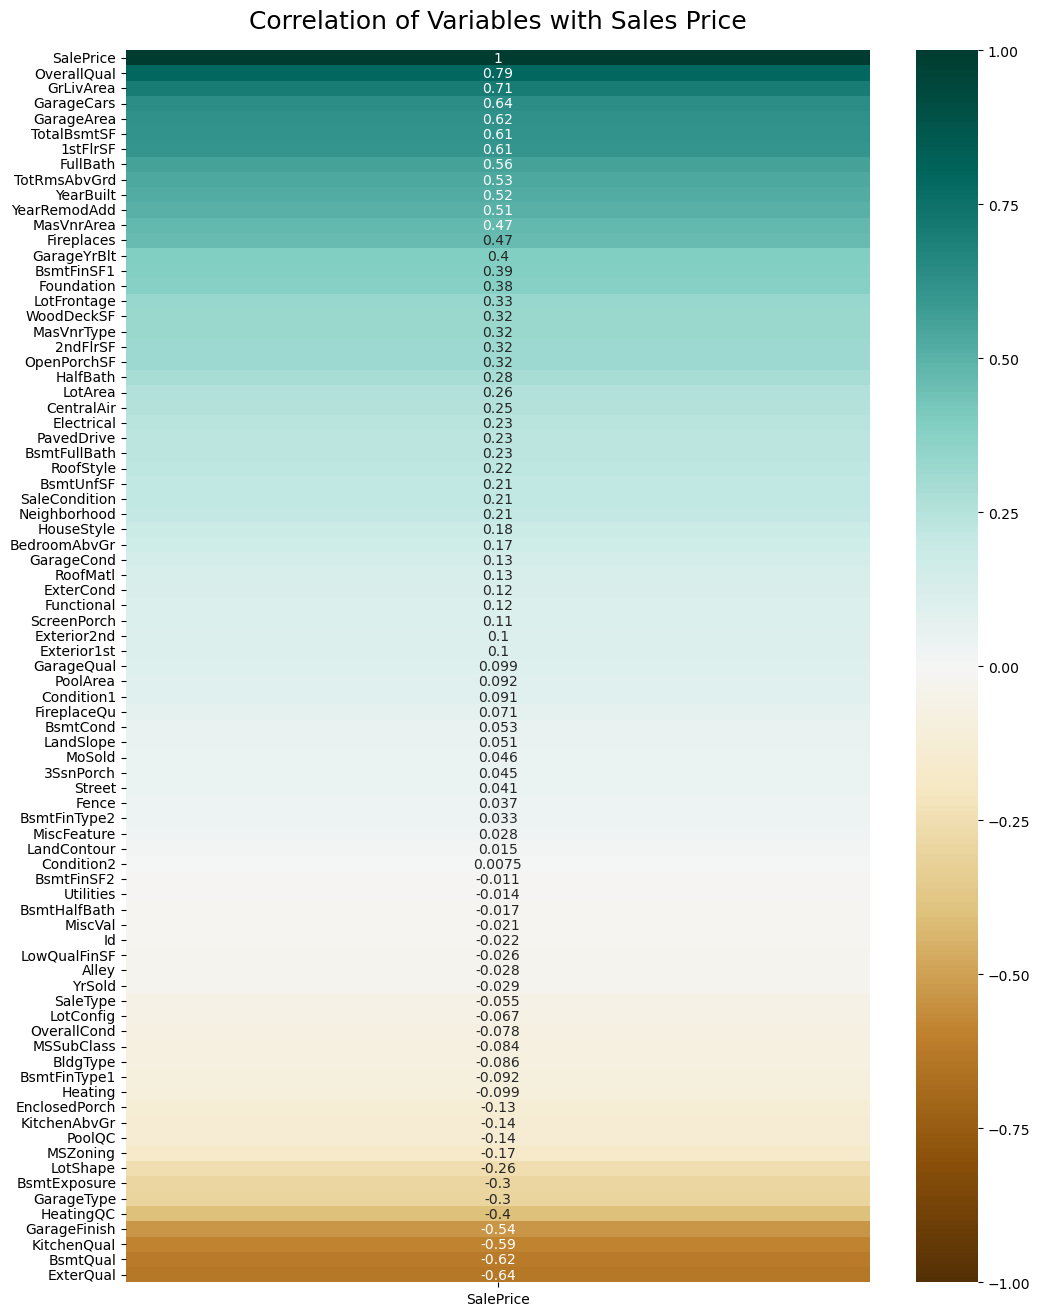

In [33]:
#checking correlation of the predictor variables with the response variable for inclusion in the model
plt.figure(figsize=(12, 16))
heatmap = sns.heatmap(df_clean.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of Variables with Sales Price', fontdict={'fontsize':18}, pad=16);

In [34]:
#selecting target
y = df_clean.SalePrice

In [35]:
#selecting predictor variables based on positive and negative correlation
houses_features = ['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 
'YearRemodAdd', 'MasVnrArea', 'Fireplaces']

In [36]:
#assigning the features to X
X = df_clean[houses_features]

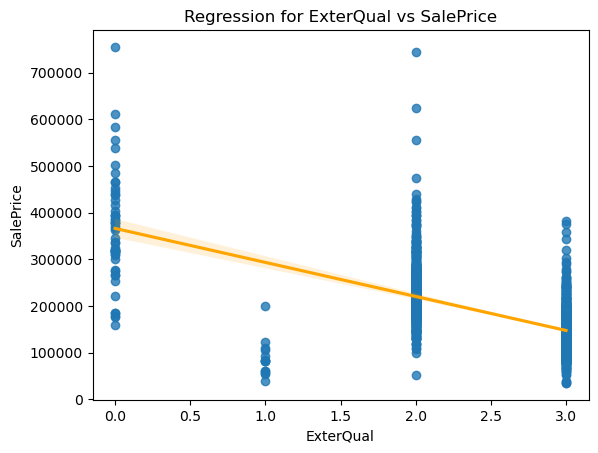

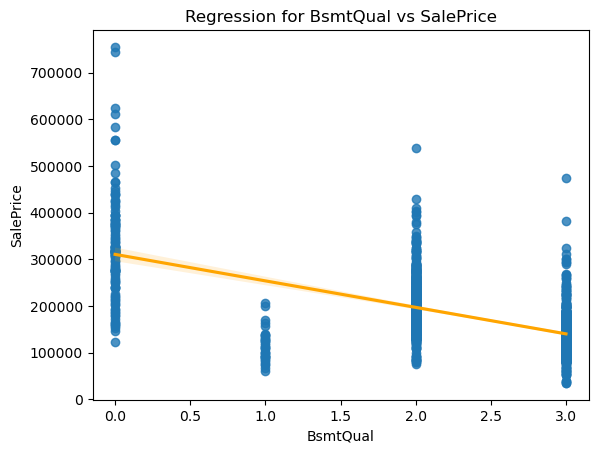

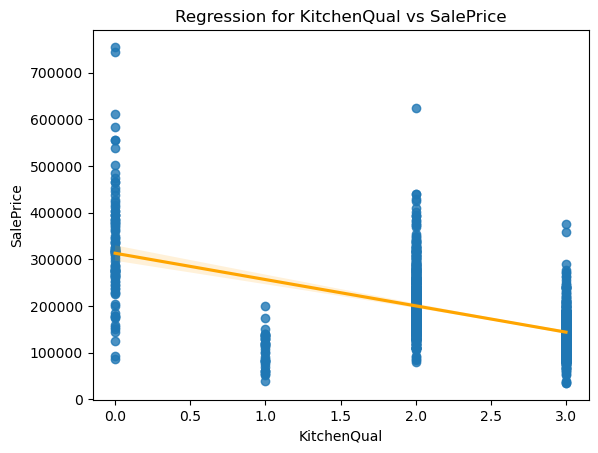

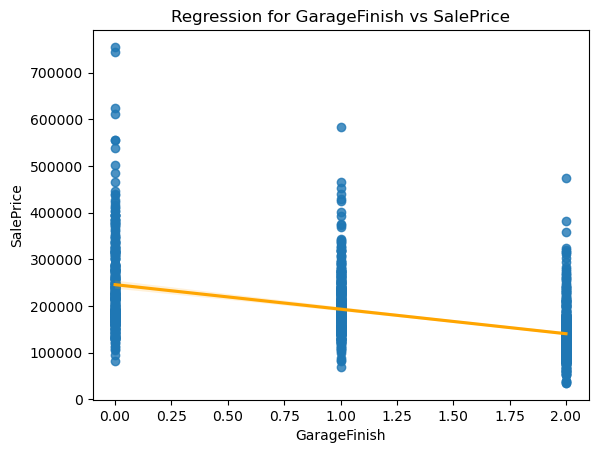

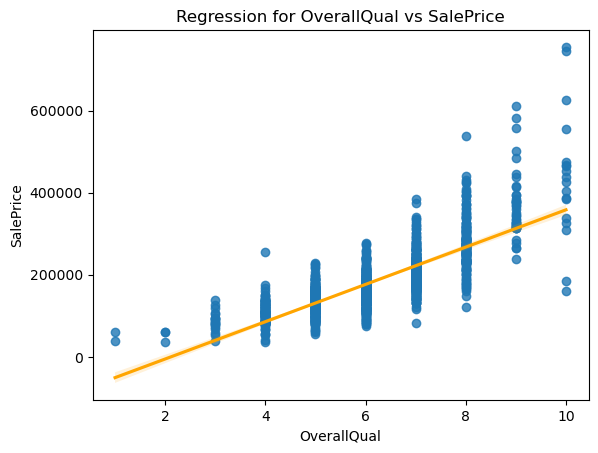

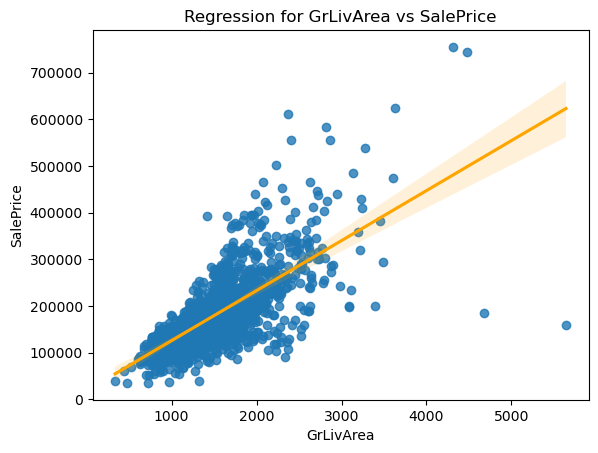

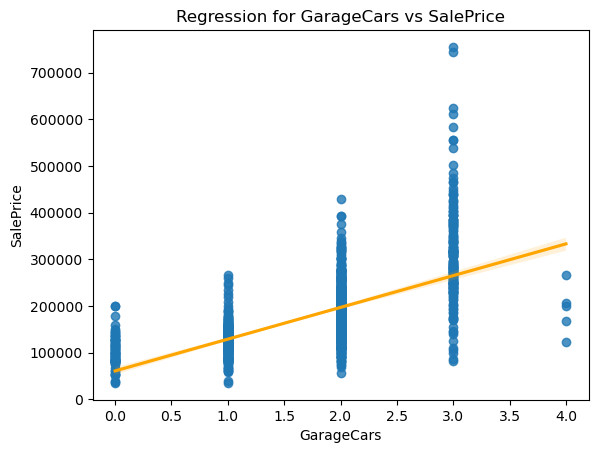

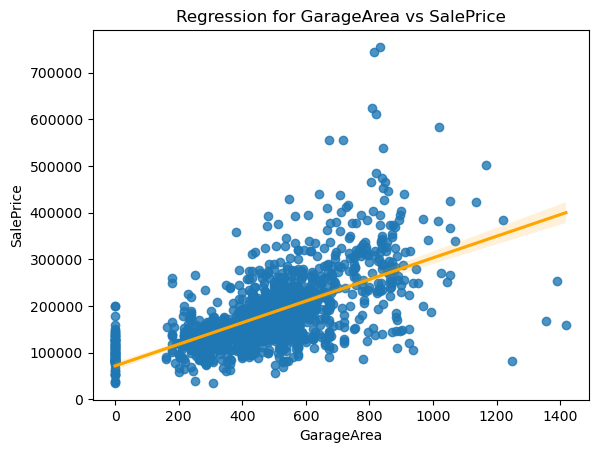

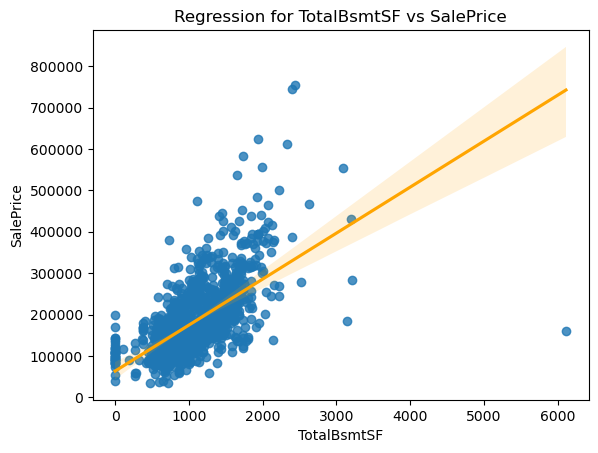

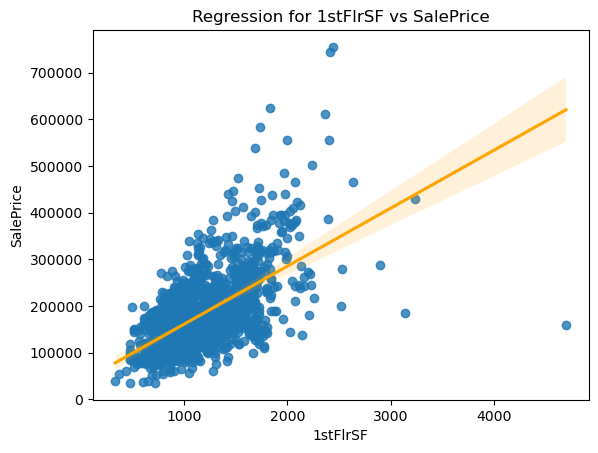

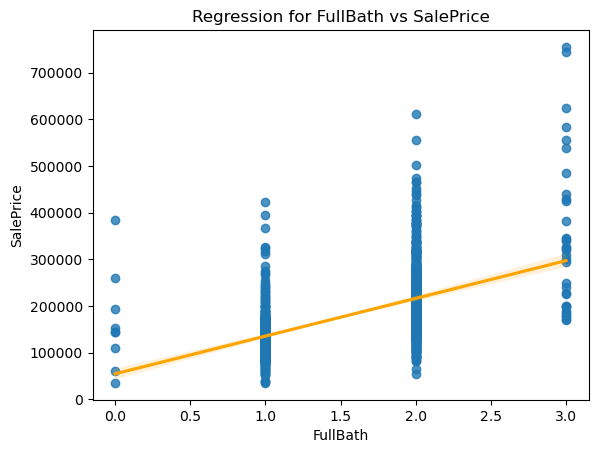

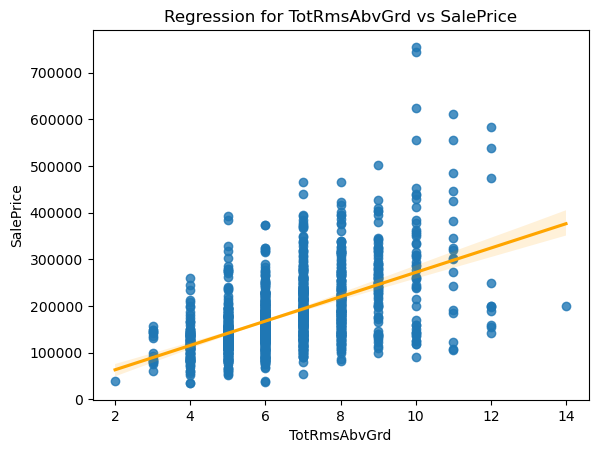

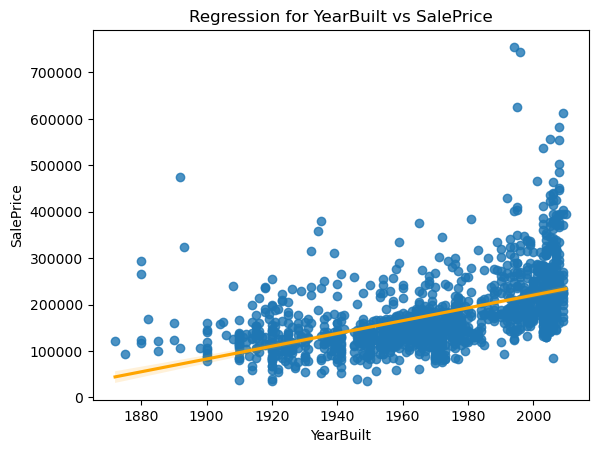

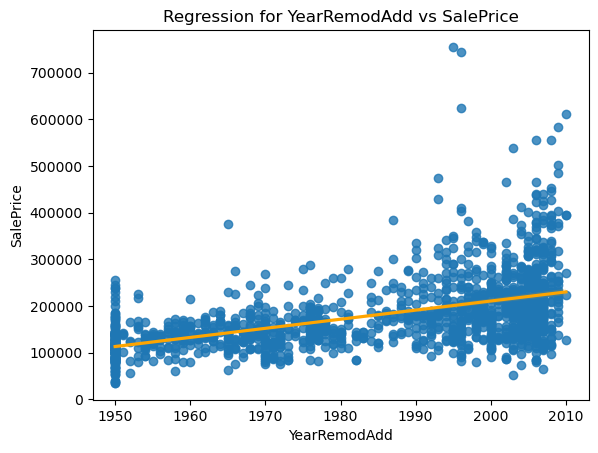

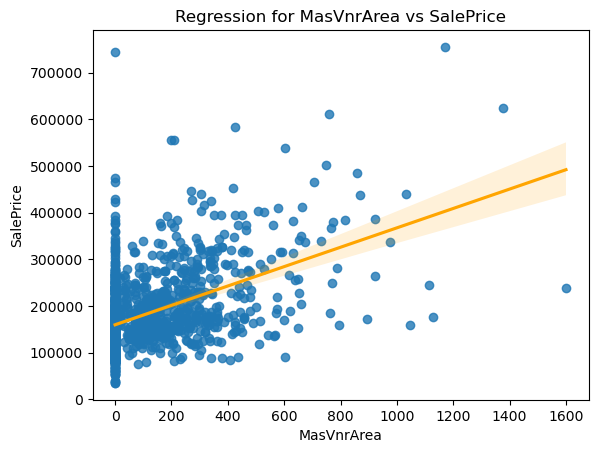

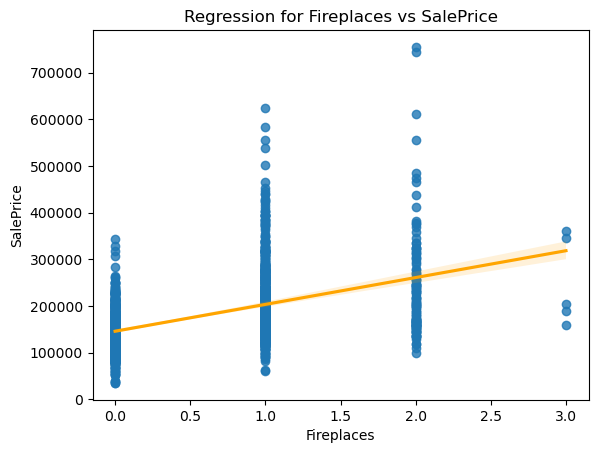

In [37]:
#plot correlation of features with target
for feature in houses_features:
    sns.regplot(x=df_clean[feature], y=df_clean['SalePrice'], line_kws={"color": "orange"})
    plt.title(f'Regression for {feature} vs SalePrice')
    plt.show()

In [38]:
#printing first 5 lines of X
X.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
0,2,2,2,1,7,1710,2,548,856,856,2,8,2003,2003,196.0,0
1,3,2,3,1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1
2,2,2,2,1,7,1786,2,608,920,920,2,6,2001,2002,162.0,1
3,3,3,2,2,7,1717,3,642,756,961,1,7,1915,1970,0.0,1
4,2,2,2,1,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,1


In [39]:
#separating training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [40]:
#aplying Scaler
scaler = StandardScaler()
train_X[houses_features] = scaler.fit_transform(train_X[houses_features])
val_X[houses_features] = scaler.fit_transform(val_X[houses_features])

## Train a Model

In [41]:
#define model
lr_model = linear_model.LinearRegression()

#fit model
lr_model.fit(train_X, train_y)

# get predicted prices on validation data
y_pred = lr_model.predict(val_X)

In [42]:
#creating DataFrame with predicted prices
y_pred_df = pd.DataFrame(y_pred, columns=["Predict_Price"])
result = pd.concat([X, y_pred_df], axis=1)
pd.set_option('display.float_format', '{:.0f}'.format)

In [43]:
#printing first 5 lines of result
result.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,Predict_Price
0,2,2,2,1,7,1710,2,548,856,856,2,8,2003,2003,196,0,242307
1,3,2,3,1,6,1262,2,460,1262,1262,2,6,1976,1976,0,1,167249
2,2,2,2,1,7,1786,2,608,920,920,2,6,2001,2002,162,1,130032
3,3,3,2,2,7,1717,3,642,756,961,1,7,1915,1970,0,1,219630
4,2,2,2,1,8,2198,3,836,1145,1145,2,9,2000,2000,350,1,121924


In [44]:
#creating new DataFrame with predicted price for better visualization
df_full = pd.concat([df_clean, y_pred_df ], axis=1)
df_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Predict_Price
0,1,60,3,65,8450,1,0,3,3,0,...,2,2,2,0,2,2008,8,4,208500,242307
1,2,20,3,80,9600,1,0,3,3,0,...,2,2,2,0,5,2007,8,4,181500,167249
2,3,60,3,68,11250,1,0,0,3,0,...,2,2,2,0,9,2008,8,4,223500,130032
3,4,70,3,60,9550,1,0,0,3,0,...,2,2,2,0,2,2006,8,0,140000,219630
4,5,60,3,84,14260,1,0,0,3,0,...,2,2,2,0,12,2008,8,4,250000,121924


## Analysis/Evaluation

In [45]:
#separating and creating dataframes based on years
df_2006 = df_full.loc[df_full['YrSold'] == 2006]
df_2007 = df_full.loc[df_full['YrSold'] == 2007]
df_2008 = df_full.loc[df_full['YrSold'] == 2008]
df_2009 = df_full.loc[df_full['YrSold'] == 2009]
df_2010 = df_full.loc[df_full['YrSold'] == 2010]

In [46]:
#printing results
print(f"Average house price in 2006: US$ {df_2006.SalePrice.mean():.0f}", f"and the expected average price: US$ {df_2006.Predict_Price.mean():.0f}")
print(f"Average house price in 2007: US$ {df_2007.SalePrice.mean():.0f}", f"and the expected average price: US$ {df_2007.Predict_Price.mean():.0f}")
print(f"Average house price in 2008: US$ {df_2008.SalePrice.mean():.0f}", f"and the expected average price: US$ {df_2008.Predict_Price.mean():.0f}")
print(f"Average house price in 2009: US$ {df_2009.SalePrice.mean():.0f}", f"and the expected average price: US$ {df_2009.Predict_Price.mean():.0f}")
print(f"Average house price in 2010: US$ {df_2010.SalePrice.mean():.0f}", f"and the expected average price: US$ {df_2010.Predict_Price.mean():.0f}")

Average house price in 2006: US$ 182549 and the expected average price: US$ 180764
Average house price in 2007: US$ 186063 and the expected average price: US$ 179987
Average house price in 2008: US$ 177361 and the expected average price: US$ 187833
Average house price in 2009: US$ 179432 and the expected average price: US$ 180468
Average house price in 2010: US$ 177394 and the expected average price: US$ 172727


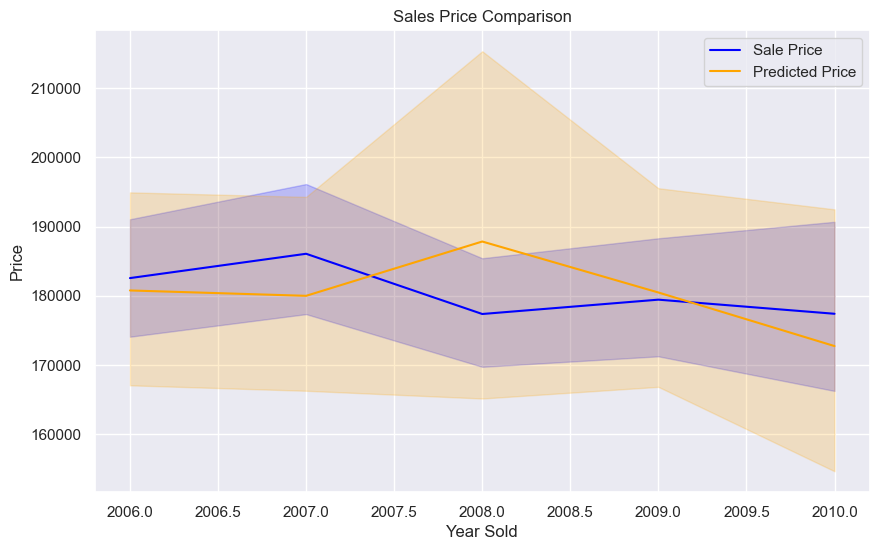

In [47]:
#comparative results of SalePrice and Predict_Price
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))  

sns.lineplot(x='YrSold', y='SalePrice', data=df_full, label='Sale Price', color='blue')
sns.lineplot(x='YrSold', y='Predict_Price', data=df_full, label='Predicted Price', color='orange')

plt.xlabel('Year Sold')
plt.ylabel('Price')
plt.title('Sales Price Comparison')
plt.legend()
plt.show()

In [49]:
#metrics
print("MAE:", mean_absolute_error(val_y, y_pred))
print("MAPE", mean_absolute_percentage_error(val_y, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(val_y, y_pred)))
print("R2:",r2_score(val_y, y_pred))
mae = mean_absolute_error(val_y, y_pred)
mape = mean_absolute_percentage_error(val_y, y_pred)
rmse = np.sqrt(mean_squared_error(val_y, y_pred))
r2 = r2_score(val_y, y_pred)

MAE: 22129.11485218608
MAPE 0.12693513450025243
RMSE: 42951.93550763108
R2: 0.7205555867882754
